# 課題1：住宅価格のデータの前処理

ここではデータの前処理について理解いただくための課題を用意しました。

ここでは住宅価格のデータセットを利用します。今回の住宅価格のデータは、Colabのランタイムに標準でインストールされている「カリフォルニア州の住宅価格」ではなく、以下のページで配布されている「アイオワ州の住宅価格」のデータを利用します。

このデータは、Dean De Cockという統計学者の論文が出典元とされていて、以下のサイトでCSVファイルの配布と各列の説明がされています。

[Housing prices in Ames, Iowa](https://www.openintro.org/data/index.php?data=ames)

各セルに入っているコメントの下に、実行するコードを記入してください。また、作業内容の一部にPandasの公式ドキュメントへのリンクを追記していますので、わからない部分がありましたら参照してください。

**注意点：**

- 列名にドット（`.`）が入っているとPandasの処理中にエラーが発生するため、元データの列名から `.` を削除しています
- PID列のみ、元データから削除しています

## 1. 必要なライブラリの読み込み

In [1]:
# 必要なライブラリの読み込み（変更しないでください）
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. データの読み込み

CSVファイル *iowa_ames_housing_price.csv* を読み込み、内容を確認します。

In [2]:
# データを変数datasetに読み込む
dataset = pd.read_csv('iowa_ames_housing_price.csv')

In [3]:
# データの最初の5行を表示
dataset.head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


全データの行数と列数を取得します。DataFrameの`shape` プロパティを参照します。

参照：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

In [4]:
# データの行数、列数を表示
dataset.shape

(1460, 81)

## 3. 要約統計量を出力する

データ数、平均や中央値、標準偏差などの統計量を確認することで、データへの理解を深めます。

DataFrameの `describe()` を使うことで、様々な統計量の情報を要約として表示されます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [5]:
# 要約統計量を表示
dataset.describe()

,Order,area,price,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,1515.463699,180921.195890,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,525.480383,79442.502883,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,334.000000,34900.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,1129.500000,129975.000000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,1464.000000,163000.000000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,1776.750000,214000.000000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,5642.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## 4. 基本的なデータの操作

データの抽出・列の分割について学びます。

### インデックスを用いた行の指定

In [6]:
# インデックス番号0から10行分抽出
dataset.iloc[0:10, :]

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,1362,143000,50,RL,85.0,14115,Pave,NaN,IR1,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,1694,307000,20,RL,75.0,10084,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,2090,200000,60,RL,NaN,10382,Pave,NaN,IR1,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,1774,129900,50,RM,51.0,6120,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,1077,118000,190,RL,50.0,7420,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [10]:
# 最初の10行だけ抽出し、「price」と「LotArea」の列を表示
dataset.loc[0:9, ['price', 'LotArea']]

,price,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
5,143000,14115
6,307000,10084
7,200000,10382
8,129900,6120
9,118000,7420


### カラム間の演算

PandasのDataFrameでは、列同士の四則演算、ならびに新しい列の追加ができます。

たとえば、`df` というDataFrameの変数があり、中に `a`,`b` というカラムが存在するとき、`df['c'] = df['a'] + df['b']` と記述することで、`a`列と`b`列の加算結果を `c` という新しい列として `df` に追加してくれます。

In [11]:
# 「X1stFlrSF」と「X2ndFlrSF」を合計した「XFlrSF_total」を新たな列としてdatasetに加える
dataset['XFlrSF_total'] = dataset['X1stFlrSF'] + dataset['X2ndFlrSF']

In [12]:
# datasetからloc関数を使用して「X1stFlrSF」と「X2ndFlrSF」、「XFlrSF_total」を先頭から5行分表示し、正しく追加されていることを確認する
dataset.loc[0:4, ['X1stFlrSF', 'X2ndFlrSF', 'XFlrSF_total']]

,X1stFlrSF,X2ndFlrSF,XFlrSF_total
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198


 ### ダミー変数の作成

列 `SaleType` は `WD`, `New`, `COD` などで構成されたカテゴリーデータです。 `get_dummies()` 関数を使用してダミー変数に変換しましょう。

参考：https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [13]:
# 列'SaleType'をダミー変数に展開したものを変数 dataset に上書きします
dataset = pd.get_dummies(dataset, columns=['SaleType'])

In [14]:
# ダミー変数が作成されていることを確認します　(datasetの最初の5行だけ出力)
dataset.head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,XFlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,1710,False,False,False,False,False,False,False,False,True
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,1262,False,False,False,False,False,False,False,False,True
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,1786,False,False,False,False,False,False,False,False,True
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,1717,False,False,False,False,False,False,False,False,True
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,2198,False,False,False,False,False,False,False,False,True


### フィルタリング

DataFrameの `query()` を使いフィルタリングを行ないましょう。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [26]:
# 'YearBuilt'が2000以降の物件のみを抽出し、最初の5件のみ表示
dataset[dataset['YearBuilt'] >= 2000].head() 

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,XFlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,1710,False,False,False,False,False,False,False,False,True
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,1786,False,False,False,False,False,False,False,False,True
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,2198,False,False,False,False,False,False,False,False,True
6,7,1694,307000,20,RL,75.0,10084,Pave,NaN,Reg,...,1694,False,False,False,False,False,False,False,False,True
11,12,2324,345000,60,RL,85.0,11924,Pave,NaN,IR1,...,2324,False,False,False,False,False,False,True,False,False


In [28]:
# 'YearBuilt'が2000以降の物件のみを抽出し、最初の5件のみ表示　をカラムが省略されてしまうので、別の方法で
with pd.option_context('display.max_columns', None, 'display.width', 2000, 'display.expand_frame_repr', False):
    display(dataset.query('YearBuilt >= 2000').head())

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,XFlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,Normal,1710,False,False,False,False,False,False,False,False,True
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,Normal,1786,False,False,False,False,False,False,False,False,True
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,Normal,2198,False,False,False,False,False,False,False,False,True
6,7,1694,307000,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,Normal,1694,False,False,False,False,False,False,False,False,True
11,12,2324,345000,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,Partial,2324,False,False,False,False,False,False,True,False,False


`'LotArea >= 15000 and MSSubClass >= 50'` のように複数の条件を指定できます。

In [29]:
# 'YearBuilt'が2000以降、'GarageCars'が3以上の物件を抽出し、最初の5件のみ表示
with pd.option_context('display.max_columns', None, 'display.width', 2000, 'display.expand_frame_repr', False):
    display(dataset.query('YearBuilt >= 2000 and GarageCars >= 3').head())

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,XFlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,Normal,2198,False,False,False,False,False,False,False,False,True
11,12,2324,345000,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,Partial,2324,False,False,False,False,False,False,True,False,False
13,14,1494,279500,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,Partial,1494,False,False,False,False,False,False,True,False,False
20,21,2376,325300,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,Partial,2376,False,False,False,False,False,False,True,False,False
25,26,1600,256300,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,640.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1566,1566,GasA,Ex,Y,SBrkr,1600,0,0,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,890,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,7,2009,Normal,1600,False,False,False,False,False,False,False,False,True


## 5. データの可視化

データを理解するには要約統計量や抽出したデータを確認するだけでは不充分であり、可視化が必要です。

### ヒストグラム

連続変数の分布を確認する際に有効です。DataFrameの `hist()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

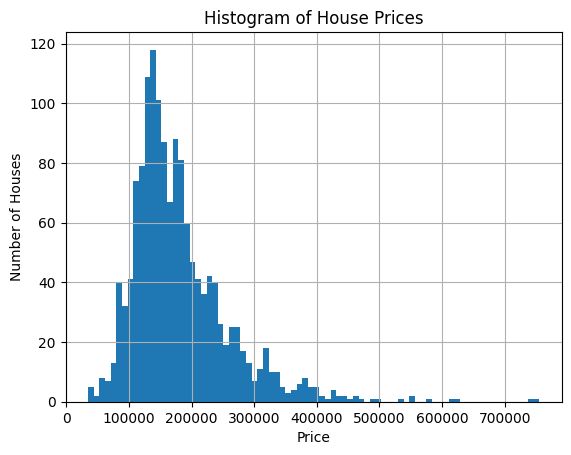

In [41]:
# datasetの'price'をヒストグラムで表示（DataFrameのhist()を利用する）
dataset['price'].hist(bins=80)
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.title('Histogram of House Prices')
plt.show()

### 散布図

2つの変数の関係性を確認する際に有効です。DataFrameの `plot()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

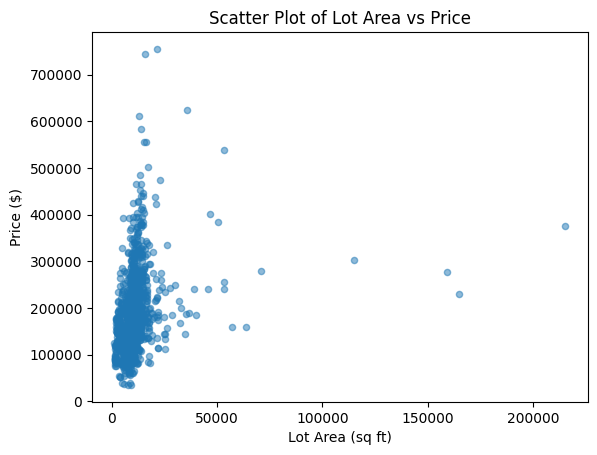

In [42]:
# datasetの'LotArea'と'price'を散布図で表示（DataFrameのplot()を利用する）
dataset.plot.scatter(x='LotArea', y='price', alpha=0.5)
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Lot Area vs Price')
plt.show()

### 棒グラフ

大小や増減を比較する際に有効です。DataFrameの `plot.bar()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

In [53]:
#datasetの'price'と'SaleCondition'の値を確認
dataset.loc[0:9, ['SaleCondition','price']]

,SaleCondition,price
0,Normal,208500
1,Normal,181500
2,Normal,223500
3,Abnorml,140000
4,Normal,250000
5,Normal,143000
6,Normal,307000
7,Normal,200000
8,Abnorml,129900
9,Normal,118000


In [44]:
#'price'のSaleConditionごとの平均を変数 price_by_condition に格納
price_by_condition = dataset.groupby('SaleCondition')['price'].mean()
price_by_condition

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: price, dtype: float64

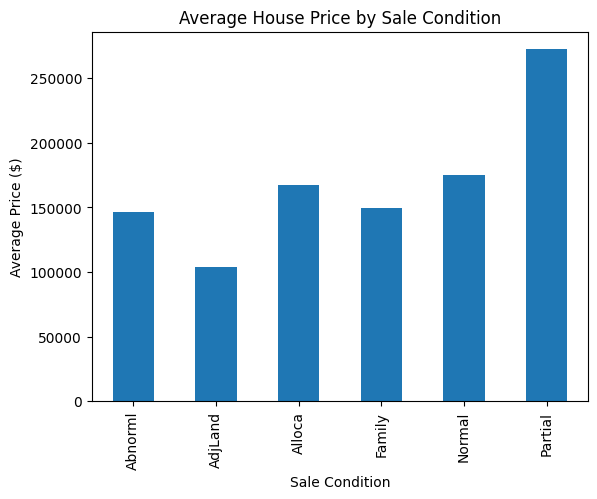

In [45]:
# price_by_conditionが持つ、棒グラフを表示する命令を実行
price_by_condition.plot.bar()
plt.xlabel('Sale Condition')
plt.ylabel('Average Price ($)')
plt.title('Average House Price by Sale Condition')
plt.show() 

### 箱ヒゲ図 (Boxplot)

複数の変数の分布を比較する際に有効です（棒グラフでは平均の比較はできますが、分布全体の比較はできません)。

DataFrameの `boxplot()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

Text(0, 0.5, 'Price ($)')

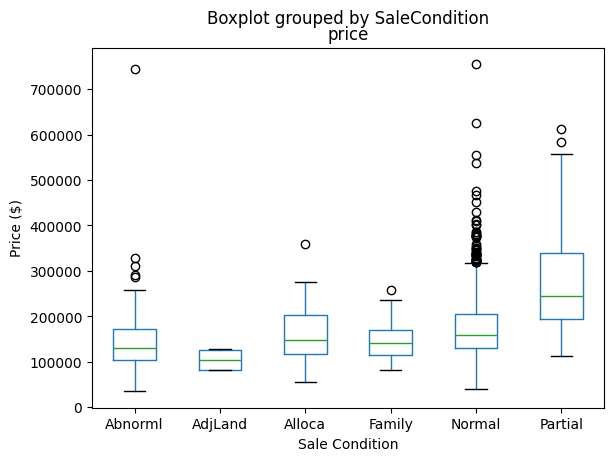

In [55]:
# datasetの'SaleCondition'ごとに'price'をDataFrameのboxplotで表示
dataset.boxplot(column='price', by='SaleCondition', grid=False)
plt.xlabel('Sale Condition')
plt.ylabel('Price ($)') 
# plt.title('Prices by Sale Condition')

## 6. 欠損値の確認

ある列が欠損値を持っているかどうかは Pandas の `isnull()` でわかります。特定の列の欠損値を知りたい場合は `pd.isnull(dataset['LotFrontage'])` のように記述します。また、`.sum()` をつなげることで、その列で欠損値を持つ行数がわかります。

参考：https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [61]:
# すべての列がそれぞれ、欠損値が何行あるかを取得
dataset.isnull().sum() # 列の途中が省略される

Order             0
area              0
price             0
MSSubClass        0
MSZoning          0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 90, dtype: int64

In [62]:
# すべての列がそれぞれ、欠損値が何行あるかを取得(列の途中が省略されないように)
with pd.option_context('display.max_rows', None, 'display.width', 2000, 'display.max_colwidth', 200):
    display(dataset.isnull().sum())

Order                0
area                 0
price                0
MSSubClass           0
MSZoning             0
LotFrontage        259
LotArea              0
Street               0
Alley             1369
LotShape             0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType         872
MasVnrArea           8
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual            37
BsmtCond            37
BsmtExposure        38
BsmtFinType1        37
BsmtFinSF1           0
BsmtFinType2        38
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir 

In [64]:
# すべての列がそれぞれ、欠損値が何行あるかを取得し、欠損値があるカラムだけを表示
# Series -> DataFrame に変換して列名を 'missing_count' にする
isnulldt = dataset.isnull().sum().to_frame('missing_count').reset_index().rename(columns={'index': 'column'})

# 欠損がある列だけ抽出（query を使用）
missing_gt0 = isnulldt.query('missing_count > 0')

display(missing_gt0)

,column,missing_count
5,LotFrontage,259
8,Alley,1369
27,MasVnrType,872
28,MasVnrArea,8
32,BsmtQual,37
33,BsmtCond,37
34,BsmtExposure,38
35,BsmtFinType1,37
37,BsmtFinType2,38
44,Electrical,1
